In [ ]:
# chapter 7-1 pandasとmatplotlibを使った探索的データ分析

In [ ]:
from datetime import datetime
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
player = 'Roger Federer'
filename = "data/{name}.csv".format(name=player.replace(' ', '-'))
df = pd.read_csv(filename)

In [ ]:
df.info()

In [ ]:
df['win'] = df['winner'] == player
df['win'].tail() 

In [ ]:
print(("{player} has won {vic:.0f}% of his ATP matches.").format(player=player, vic=100*df['win'].mean()))

In [ ]:
date = pd.to_datetime(df['start date'])

In [ ]:
df['dblfaults'] = (df['player1 double faults'] / df['player1 total points total'])

In [ ]:
df['dblfaults'].tail()

In [ ]:
df['dblfaults'].describe()

In [ ]:
df.groupby('surface')['win'].mean()

In [ ]:
gb = df.groupby('year')

In [ ]:
plt.figure(figsize=(8, 4))
plt.plot_date(date.astype(datetime), df['dblfaults'], alpha=.25, lw=0);
plt.plot_date(gb['start date'].max(),  gb['dblfaults'].mean(), '-', lw=3);
plt.xlabel('Year');
plt.ylabel('Proportion of double faults per match.');

In [ ]:
# 7-2 はじめての統計的仮説検定 : 簡単なZ検定

In [ ]:
import numpy as np
import scipy.stats as st
import scipy.special as sp

In [ ]:
n = 100 # コイントスの回数
h = 61 # 表が出た回数
q = .5 # 帰無仮説（コインに歪みがない）

In [ ]:
xbar = float(h)/n
z = (xbar - q) * np.sqrt(n / (q*(1-q))); z # Zスコア

In [ ]:
pval = 2 * (1 - st.norm.cdf(z)); pval # p値

In [ ]:
# chapter 7-3 はじめてのベイズ法

In [2]:
import numpy as np
import scipy.stats as st
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
posterior = lambda n ,h, q: ((n+1) * st.binom(n, q).pmf(h))

In [ ]:
n = 100
h = 61
q = np.linspace(0., 1., 1000)
d = posterior(n, h, q)

In [ ]:
plt.figure(figsize=(5,3));
plt.plot(q, d, '-k');
plt.xlabel('q parameter');
plt.ylabel('Posterior distribution');
plt.ylim(0, d.max()+1);

In [ ]:
# chapter 7-4 分割表とカイ二乗検定を用いた二変数間の相関検定

In [3]:
import numpy as np
import pandas as pd
import scipy.stats as st
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
player = 'Roger Federer'
filename = "data/{name}.csv".format(name=player.replace(' ', '-'))
df = pd.read_csv(filename)

In [5]:
print("Number of columns: " + str(len(df.columns)))
df[df.columns[:4]].tail()

Number of columns: 70


,year,tournament,start date,type
1174,2012,"Australian Open, Australia",16.01.2012,GS
1175,2012,"Doha, Qatar",02.01.2012,250
1176,2012,"Doha, Qatar",02.01.2012,250
1177,2012,"Doha, Qatar",02.01.2012,250
1178,2012,"Doha, Qatar",02.01.2012,250


In [7]:
npoints = df['player1 total points total']
points = df['player1 total points won'] / npoints
aces = df['player1 aces'] / npoints

(0.0, 0.16293103448275861)

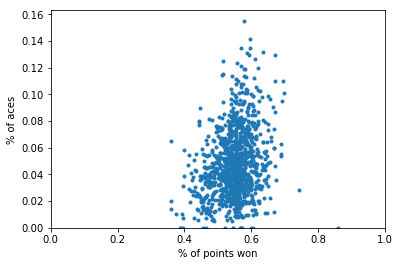

In [8]:
plt.plot(points, aces, '.')
plt.xlabel('% of points won')
plt.ylabel('% of aces')
plt.xlim(0., 1.)
plt.ylim(0.)

In [9]:
df_bis = pd.DataFrame({'points': points, 'aces':aces}).dropna()
df_bis.tail()

,aces,points
1173,0.024390,0.585366
1174,0.039855,0.471014
1175,0.046512,0.639535
1176,0.020202,0.606061
1177,0.069364,0.531792


In [10]:
df_bis.corr() # ピアソン相関係数を計算

,aces,points
aces,1.000000,0.255457
points,0.255457,1.000000


In [11]:
df_bis['result'] = df_bis['points'] > df_bis['points'].median()
df_bis ['manyaces'] = df_bis['aces'] > df_bis['aces'].median()

In [12]:
pd.crosstab(df_bis['result'], df_bis['manyaces']) # 4つの可能性(TrueとTrue、TrueとFalse等)それぞれの分割表

manyaces,False,True
result,,
False,300,214
True,214,299


In [13]:
st.chi2_contingency(_) # カイ二乗検定、2番目の値がp値

(27.809858855369555,
 1.3384233799633629e-07,
 1,
 array([[ 257.25024343,  256.74975657],
        [ 256.74975657,  256.25024343]]))

In [14]:
# chapter 7-5 最尤法を用いたデータへの確率分布のあてはめ